In [14]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
from google.colab import files
uploaded =  files.upload()

Saving KDD99_chi2_10.csv to KDD99_chi2_10.csv


In [16]:
df = pd.read_csv('KDD99_chi2_10.csv')
df.head()

,duration,protocol_type,service,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_count,dst_host_srv_count,labels
0,0,1,22,181,5450,1,8,8,9,9,1
1,0,1,22,239,486,1,8,8,19,19,1
2,0,1,22,235,1337,1,8,8,29,29,1
3,0,1,22,219,1337,1,6,6,39,39,1
4,0,1,22,217,2032,1,6,6,49,49,1


In [17]:
X = df.drop('labels', axis = 1)
y = df['labels']
X.shape, y.shape

((793486, 10), (793486,))

In [18]:
# to devide the data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((555440, 10), (238046, 10), (555440,), (238046,))

## **classification / supervised learning**

Classification Models

In [6]:
rf = RandomForestClassifier()

RF with TTS

In [19]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [26]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [27]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118970
           1       1.00      1.00      1.00    119076

    accuracy                           1.00    238046
   macro avg       1.00      1.00      1.00    238046
weighted avg       1.00      1.00      1.00    238046



In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118929     41]
 [     8 119068]]


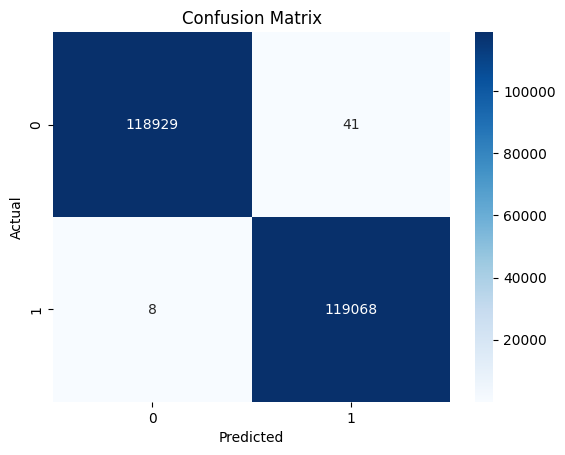

In [29]:
# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()